# Coordinate system and footprint

***
## 4 coordinate systems
There are 4 coordinates system in ztfimg:
- `xy`: pixel position of the image ("quadrant" pixels)
- `ij`: ccd pixel coordinates (xy and ij are the equal for CCD image)
- `uv`: focal plane coordinates (in arcsec)
- `radec`: sky coordinates

**In all cases, systems coordinates are: +Dec (North) upward and +RA (East) rightward.**

***
## system conversion tools
`ztfimg.ScienceQuadrant`, that have a wcs solution, hold the conversion system method such as `xy_to_radec()` or `uv_to_ij()` ; all combination exists. 


In [2]:
import ztfimg
qimg = ztfimg.ScienceQuadrant.from_filename("ztf_20200924431759_000655_zr_c13_o_q2_sciimg.fits",
                                   as_path=False)

### ij | ccd coordinates
remember that ccds are as such:
```
q2 | q1
--------
q3 | q4
```

So q1 and q2 y-values have +“quadrant-y-shape” for y and q1 and q4 have +“quadrant-x-shape” for their x

In [3]:
print(qimg.qid)
qimg.xy_to_ij(10,10)

2


array([  10, 3090])

### uv | focal plane coordinates
The uv coordinates contains the tangent plane coordinates to know the location of the element within the full focal plane.

So, for instance, the 0,0 pixel is approximatly at position ~7000, 10_000 arcsec within the focalplane

In [24]:
qimg.xy_to_uv(0,0).squeeze()

array([ 7031.58753668, 10320.50186255])

### radec | sky coordinates

finally the (40, 300), and (1700,801) xy-pixels corresponds (for this exposure)

In [25]:
ra,dec = qimg.xy_to_radec([40, 1700],[300, 801])
ra,dec

(array([57.4935367 , 58.07736917]), array([36.2742405 , 36.40336741]))

***
## system conversion tools
When requesting image center or corners, the `system` method option enable you to choose which system you want the results in.

- `get_center()`: center of the image (quadrant or ccd)
- `get_corners()`: corners of the image (quadrant or ccd) | lower-left, lower-right, upper-right, upper-left

In [26]:
qimg.get_center(system="ij")

array([1536.5, 4620.5])

In [27]:
qimg.get_corners("uv")

array([[ 7031.58753668, 10320.50186255],
       [10151.5276707 , 10329.57701145],
       [10150.9176875 , 13462.39473092],
       [ 7029.41028383, 13450.96916209]])

***
## show footprint (FocalPlane and CCD)

The show_footprint() method enables you to display the quadrants or ccd colored by a single value (or None). 

In [28]:
ccd = qimg.get_ccd()

In [29]:
fp = qimg.get_focalplane()

<IPython.core.display.Javascript object>


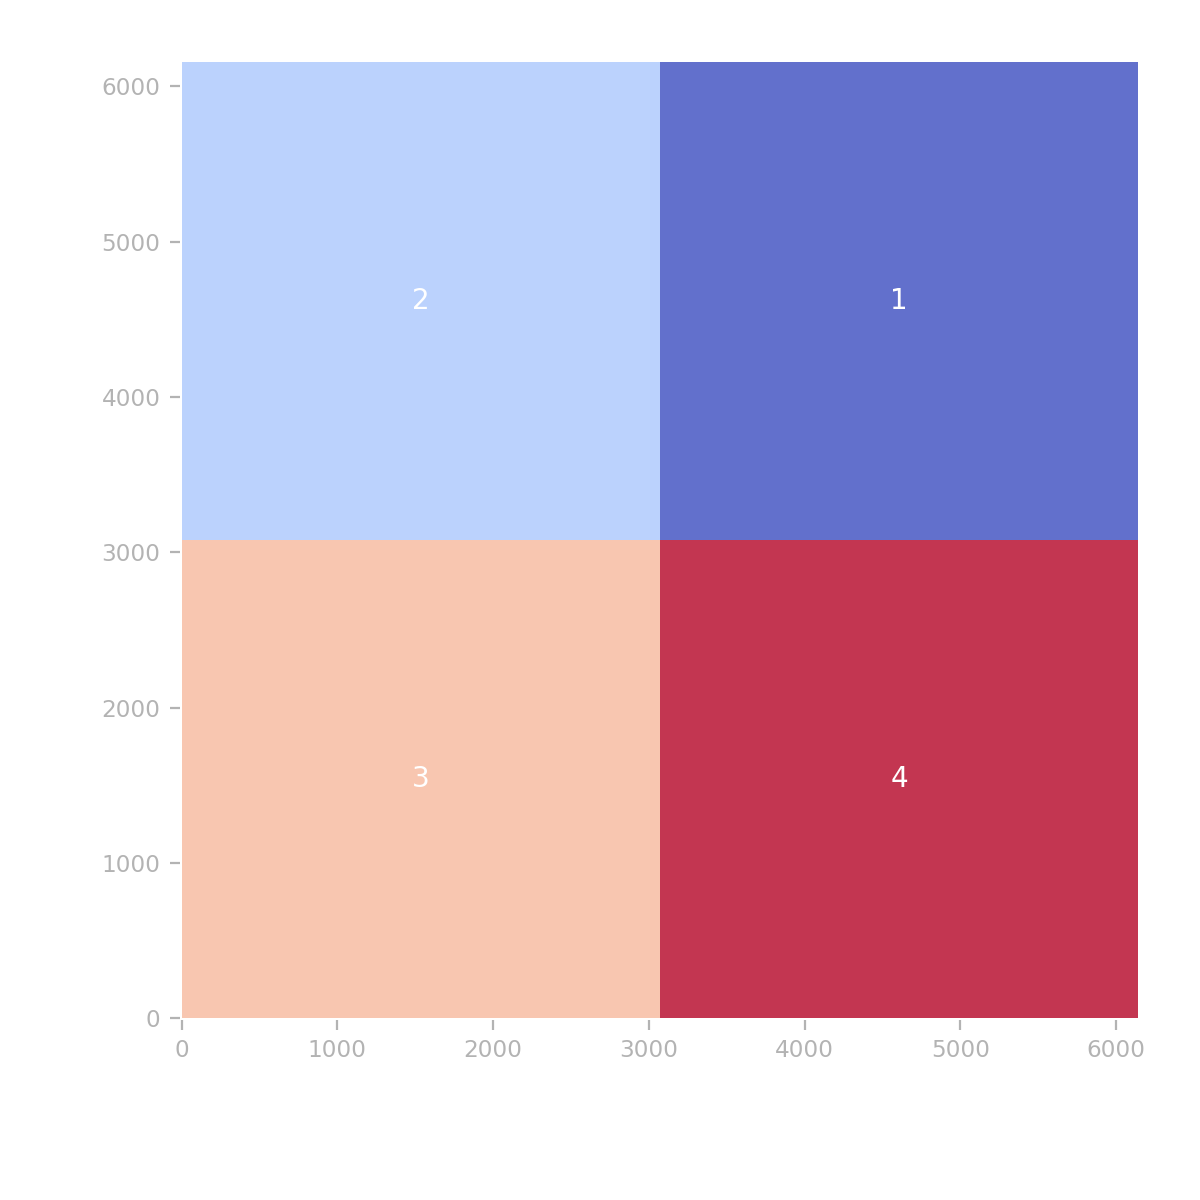

In [30]:
_ = ccd.show_footprint()

<IPython.core.display.Javascript object>


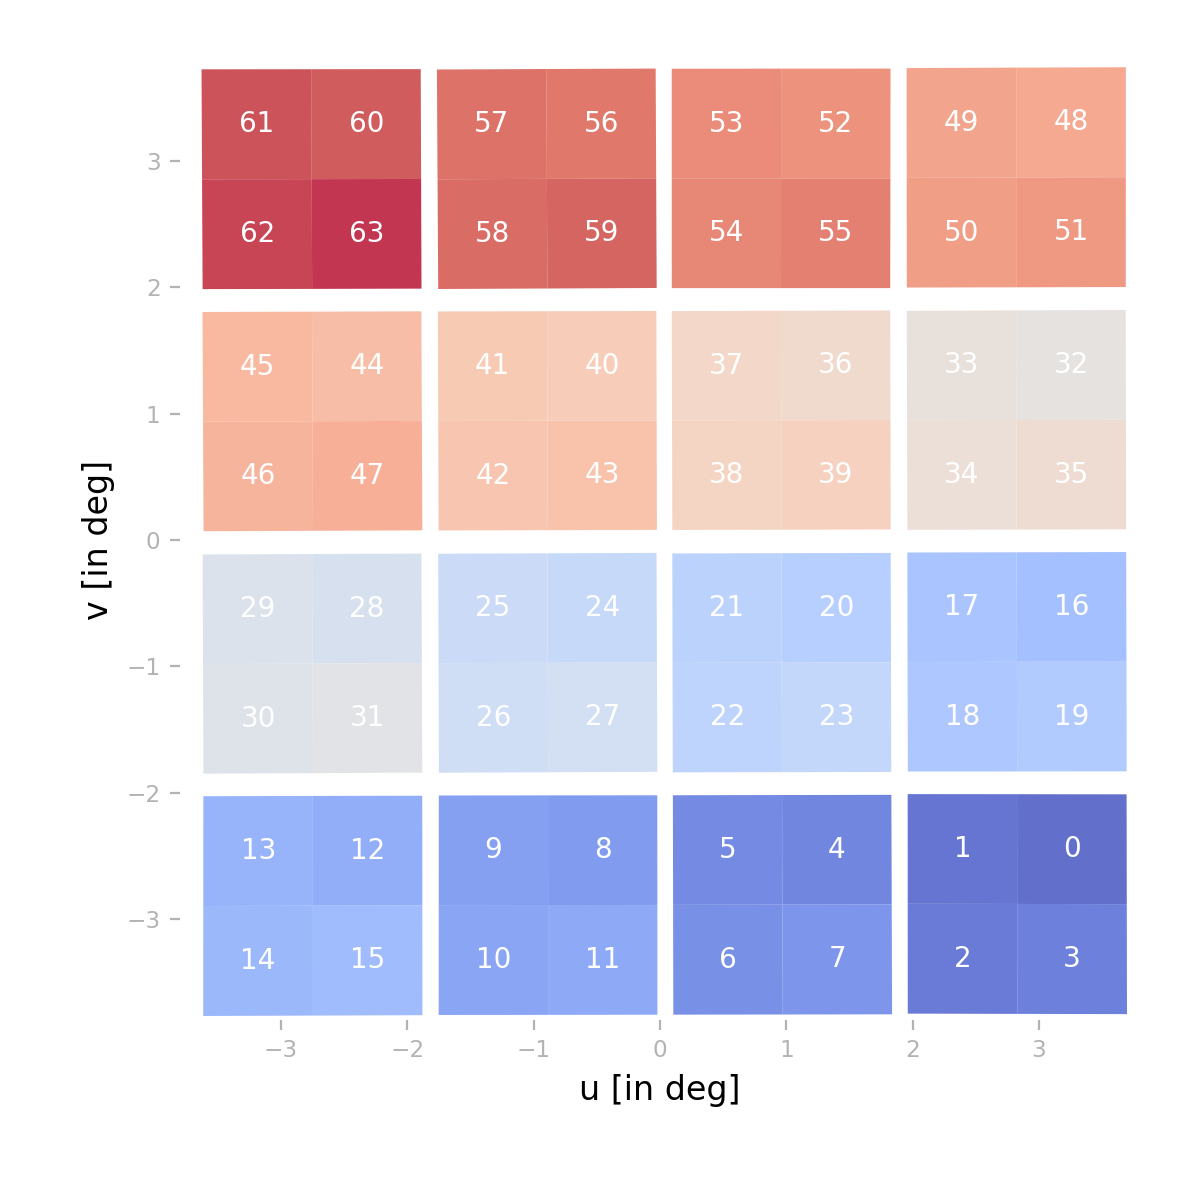

In [31]:
_ = fp.show_footprint()

put any attribute, or result or quadrant.get_value() like the header key MAGZP

<IPython.core.display.Javascript object>


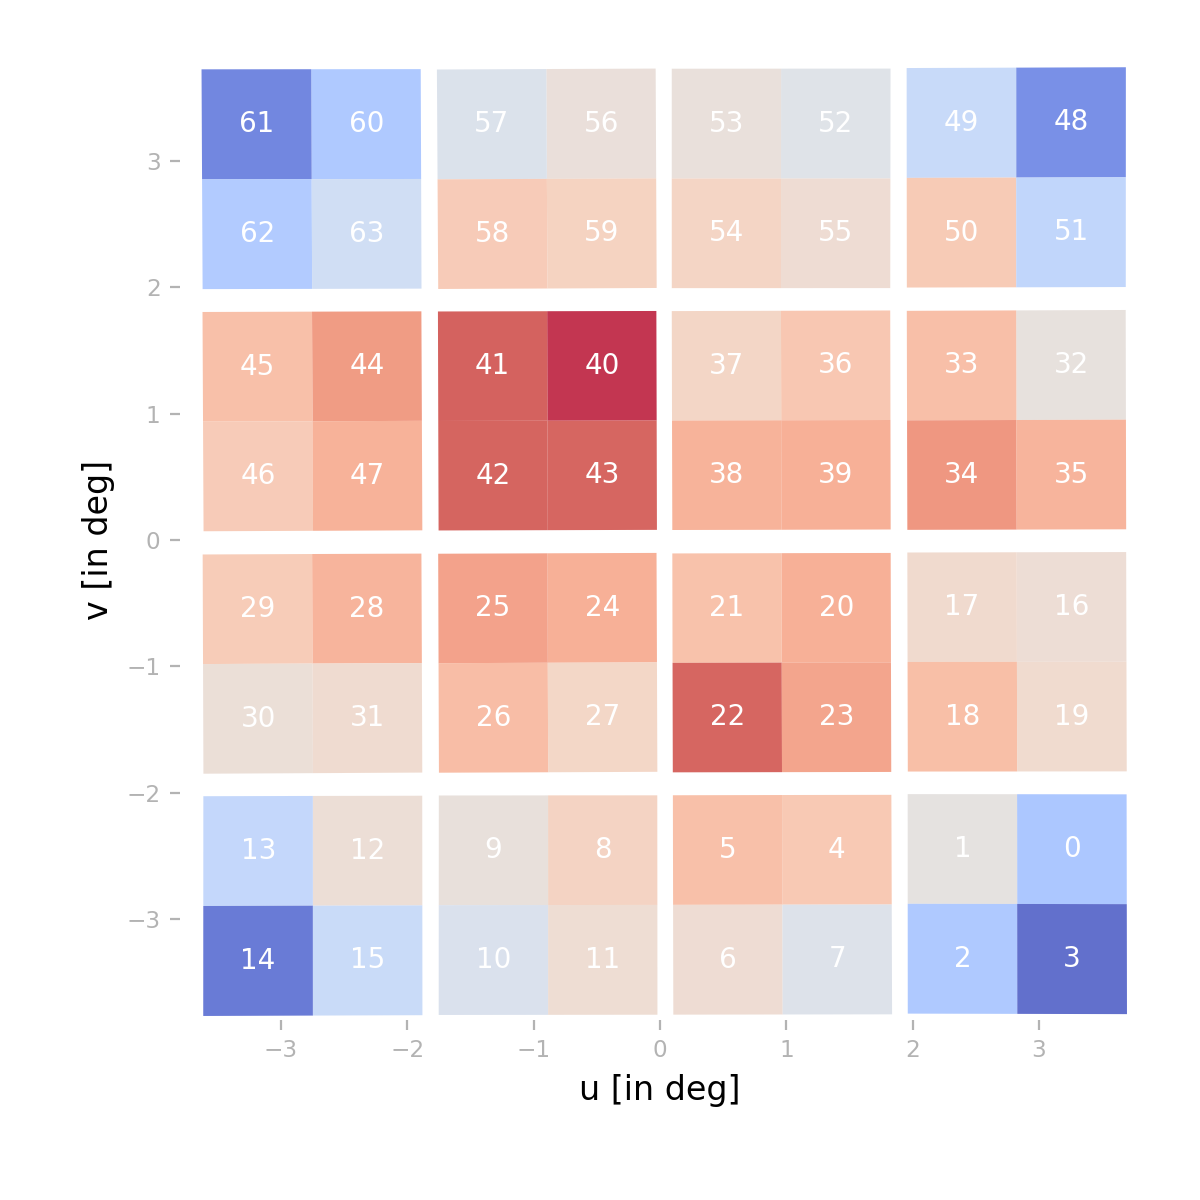

In [32]:
_ = fp.show_footprint("MAGZP")